# Bias Finder

This notebook analyses bias

In [3]:
import pandas as pd
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from Utils import *
# import warnings; warnings.filterwarnings(action='once')

ModuleNotFoundError: No module named 'seaborn'

In [4]:
Disease_df = pd.read_csv("NY_DB_stat.csv")

Disease_df.head(20)
Top_prevalent_diseases= Disease_df.head(20)

We just printed 20 most prevalent diseases. 
Let's make a histogram.

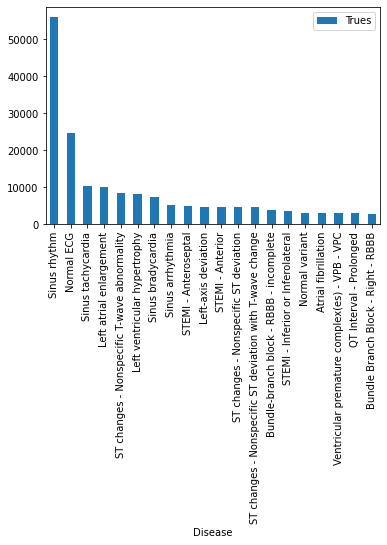

In [5]:
ax = Top_prevalent_diseases.plot.bar(x="Disease", y="Trues", rot=90)

Now that we saw that the 2 most prevalent categories are healthy subjects, let's take sick people with categories 3-20 and inspect them

In [6]:
Final_categories = Top_prevalent_diseases.tail(18)
Final_categories

,Disease,Trues,Falses
2,Sinus tachycardia,10190,69046
3,Left atrial enlargement,10099,69137
4,ST changes - Nonspecific T-wave abnormality,8348,70888
5,Left ventricular hypertrophy,8069,71167
6,Sinus bradycardia,7213,72023
7,Sinus arrhythmia,5292,73944
8,STEMI - Anteroseptal,4900,74336
9,Left-axis deviation,4562,74674
10,STEMI - Anterior,4535,74701
11,ST changes - Nonspecific ST deviation,4511,74725


## Correlogram

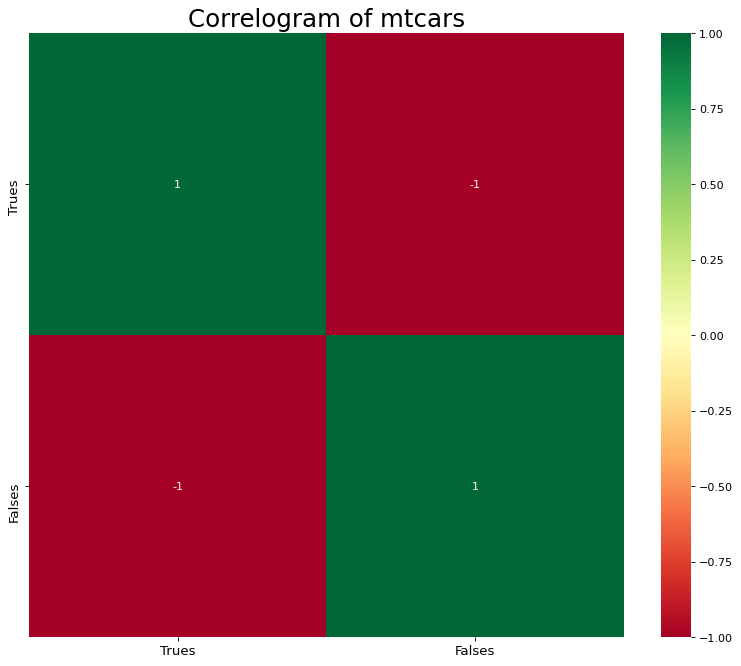

In [7]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(Disease_df.corr(), xticklabels=Disease_df.corr().columns, yticklabels=Disease_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
# Create vectors for each category
Records_df = pd.read_csv("NO_SPACES.csv")
diseases_num = Final_categories.shape
records_num = Records_df.shape
diseases_num = diseases_num[0]
records_num = records_num[0]
summary_matrix = np.zeros((records_num,diseases_num))
disease_cntr = 0 
for indx, row in Final_categories.T.iteritems():
    print(row["Disease"])
    for record_indx, record in Records_df.T.iteritems(): 
        if (record==row["Disease"]).any()==True:
            summary_matrix[record_indx,disease_cntr] = 1.0
    disease_cntr+=1



Sinus tachycardia
Left atrial enlargement
ST changes - Nonspecific T-wave abnormality
Left ventricular hypertrophy
Sinus bradycardia
Sinus arrhythmia
STEMI - Anteroseptal
Left-axis deviation
STEMI - Anterior


In [1]:
# Calculate cross - correlation matrix 
cross_correlation_mat= np.zeros((diseases_num,diseases_num))
corr_result = Normalized_cross_corr(summary_matrix[:,0],summary_matrix[:,1])

NameError: name 'np' is not defined

# Training Results
## First , I trained each each category separately 

In [ ]:
headers = ['Epoch','Training_accuracy','Test_accuracy','Training_loss','Test_loss','Is_checkpoint']
Training_Normal_Variant = pd.read_csv(r"Data\Normal_variant.txt",sep='\t',names=headers,header=0)
Training_LVH = pd.read_csv(r"Data\Left_ventricular_hypertrophy.txt",sep='\t',names=headers,header=0)
Training_Normal_Variant.head(5)

,Epoch,Training_accuracy,Test_accuracy,Training_loss,Test_loss,Is_checkpoint
0,0,73.07,69.83,0.403405,0.504443,True
1,1,86.68,76.27,0.288900,0.686147,True
2,2,88.75,80.10,0.359118,0.489416,True
3,3,89.74,78.46,0.246540,0.413355,False
4,4,90.61,81.09,0.119978,0.362629,True


Text(0.5, 1.0, 'Left Ventricular Hypertrophy- Vanilla Training')

<Figure size 960x800 with 0 Axes>

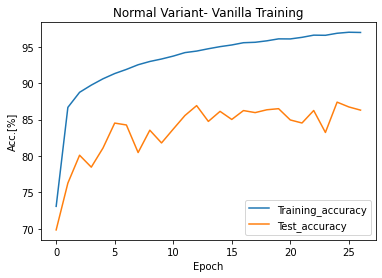

<Figure size 960x800 with 0 Axes>

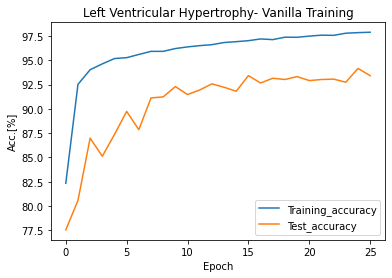

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
ax = Training_Normal_Variant.plot(x="Epoch", y="Training_accuracy")
Training_Normal_Variant.plot(x="Epoch", y="Test_accuracy",ax=ax)
plt.xlabel('Epoch')
plt.ylabel('Acc.[%]')
plt.title('Normal Variant- Vanilla Training')

plt.figure(figsize=(12,10), dpi= 80)
ax2 = Training_LVH.plot(x="Epoch", y="Training_accuracy")
Training_LVH.plot(x="Epoch", y="Test_accuracy",ax=ax2)
plt.xlabel('Epoch')
plt.ylabel('Acc.[%]')
plt.title('Left Ventricular Hypertrophy- Vanilla Training')

# Plot of convergence of learning vs. q value in generalized cross-entropy

Text(0, 0.5, '%')

<Figure size 960x800 with 0 Axes>

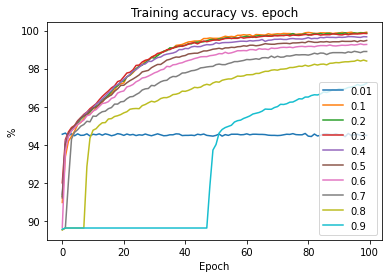

In [ ]:
import os
import pandas as pd
headers = ['Epoch','Training_accuracy','Test_accuracy','Training_loss','Test_loss','Is_checkpoint']
plt.figure(figsize=(12,10), dpi= 80)
cwd = os.getcwd()
q_files_dir = os.path.join(cwd,r'q_values_data')
q_files = os.listdir(q_files_dir)
q_list = []
fig, ax = plt.subplots(1, 1)
for i, file in enumerate(q_files):
    q_list.append(file[:-4])    
    data=pd.read_csv(os.path.join(q_files_dir,file),sep='\t',names=headers,header=0)
    # print(data.head(5))
    data.plot(x="Epoch", y="Training_accuracy",ax=ax, label= file[:-4])    
    # ax2 = data.plot(x="Epoch", y="Test_accuracy")
    # data.plot(x="Epoch", y="Test_accuracy",ax=ax2)
    # plt.xlabel('Epoch')
    # plt.ylabel('Acc.[%]')
plt.title('Training accuracy vs. epoch')
plt.ylabel('%')

Text(0, 0.5, '%')

<Figure size 960x800 with 0 Axes>

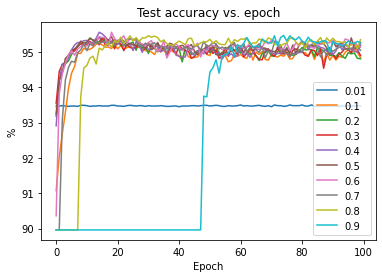

In [ ]:
import os
import pandas as pd
headers = ['Epoch','Training_accuracy','Test_accuracy','Training_loss','Test_loss','Is_checkpoint']
plt.figure(figsize=(12,10), dpi= 80)
cwd = os.getcwd()
q_files_dir = os.path.join(cwd,r'q_values_data')
q_files = os.listdir(q_files_dir)
q_list = []
fig, ax = plt.subplots(1, 1)
for i, file in enumerate(q_files):
    q_list.append(file[:-4])    
    data=pd.read_csv(os.path.join(q_files_dir,file),sep='\t',names=headers,header=0)
    # print(data.head(5))
    data.plot(x="Epoch", y="Test_accuracy",ax=ax, label= file[:-4])    
    # ax2 = data.plot(x="Epoch", y="Test_accuracy")
    # data.plot(x="Epoch", y="Test_accuracy",ax=ax2)
    # plt.xlabel('Epoch')
    # plt.ylabel('Acc.[%]')
plt.title('Test accuracy vs. epoch')
plt.ylabel('%')

# Learning from Failure Arcitecture

## Comparison of training and test accuracy to network vanilla

Execution_dump_kernel_Exp1_q_0_95LfF_GPU0.txt
[<AxesSubplot:> <AxesSubplot:>]
0 0_95 <class 'str'>
Execution_dump_kernel_Exp2_q_0_05LfF_GPU1.txt
[<AxesSubplot:xlabel='Epoch'> <AxesSubplot:xlabel='Epoch'>]
1 0_05 <class 'str'>
Execution_dump_kernel_Exp3_q_0_25LfF_GPU3.txt
[<AxesSubplot:xlabel='Epoch'> <AxesSubplot:xlabel='Epoch'>]
2 0_25 <class 'str'>
Execution_dump_kernel_Exp4_q_0_45LfF_GPU2.txt
[<AxesSubplot:xlabel='Epoch'> <AxesSubplot:xlabel='Epoch'>]
3 0_45 <class 'str'>
Execution_dump_kernel_Exp5_q_0_65LfF_GPU4.txt
[<AxesSubplot:xlabel='Epoch'> <AxesSubplot:xlabel='Epoch'>]
4 0_65 <class 'str'>
Execution_dump_kernel_Exp7_q_0_8LfF_GPU6.txt
[<AxesSubplot:xlabel='Epoch'> <AxesSubplot:xlabel='Epoch'>]
5 0_8L <class 'str'>
Execution_dump_kernel_Exp8_VANILLALfF_GPU5.txt
[<AxesSubplot:xlabel='Epoch'> <AxesSubplot:xlabel='Epoch'>]
6 VANILLAL <class 'str'>


<Figure size 960x800 with 0 Axes>

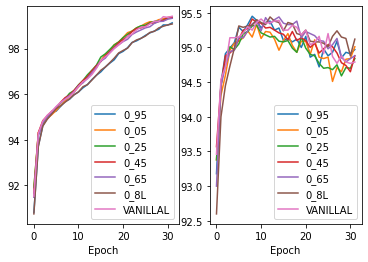

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
headers = ['Epoch','Training_accuracy','Test_accuracy','Training_loss','Test_loss','Is_checkpoint']
plt.figure(figsize=(12,10), dpi= 80)
cwd = os.getcwd()
files_dir = os.path.join(cwd,r'LfF_data')
result_files = os.listdir(files_dir)
fig, ax = plt.subplots(1, 2)
files_list = []
for i, file in enumerate(result_files):
    print(file)
    print(ax)
    data=pd.read_csv(os.path.join(files_dir,file),sep='\t',names=headers,header=0)
    l = [file[29:33] if i < 6 else file[27:34]][0]
    # print(data.head(5))
    print(i, l, type(l))
    data.plot(x="Epoch", y="Training_accuracy",ax=ax[0], label= l)   
    data.plot(x="Epoch", y="Test_accuracy",ax=ax[1], label= l)                 